MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34

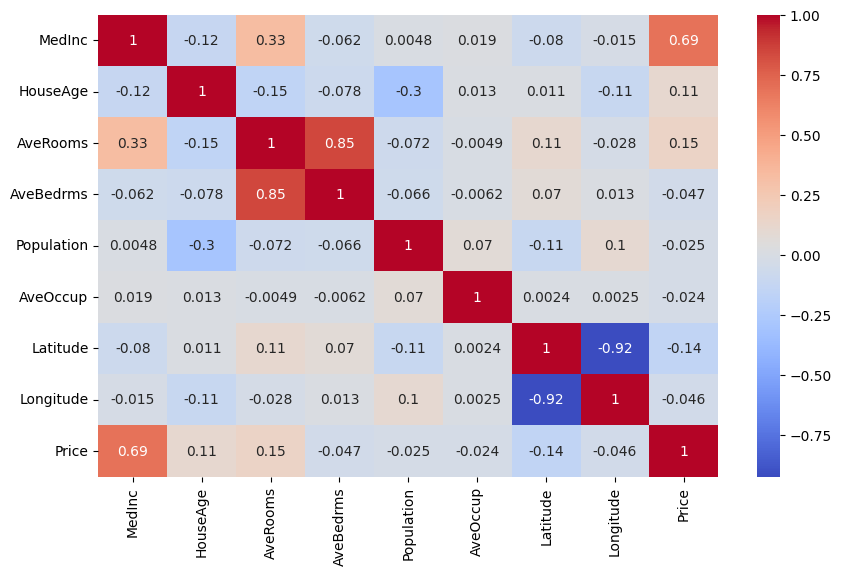

Model RMSE: 0.74558
Model R^2: 0.57579


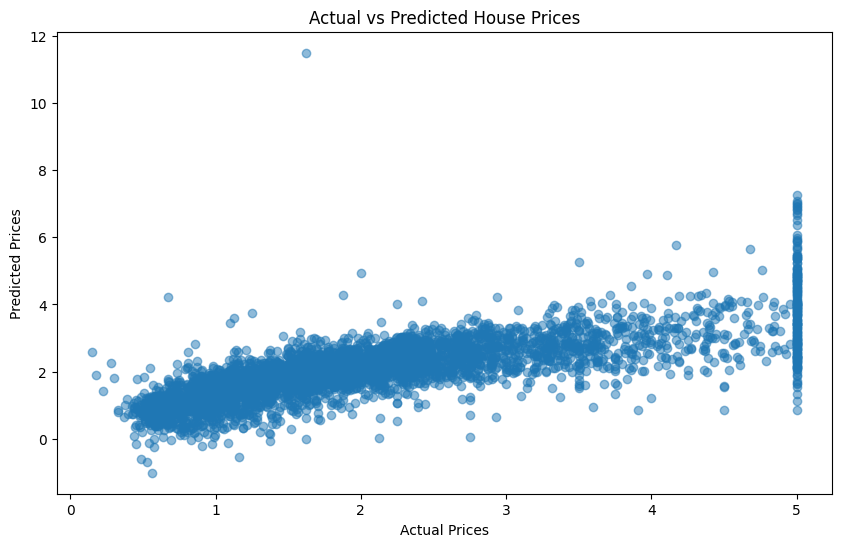

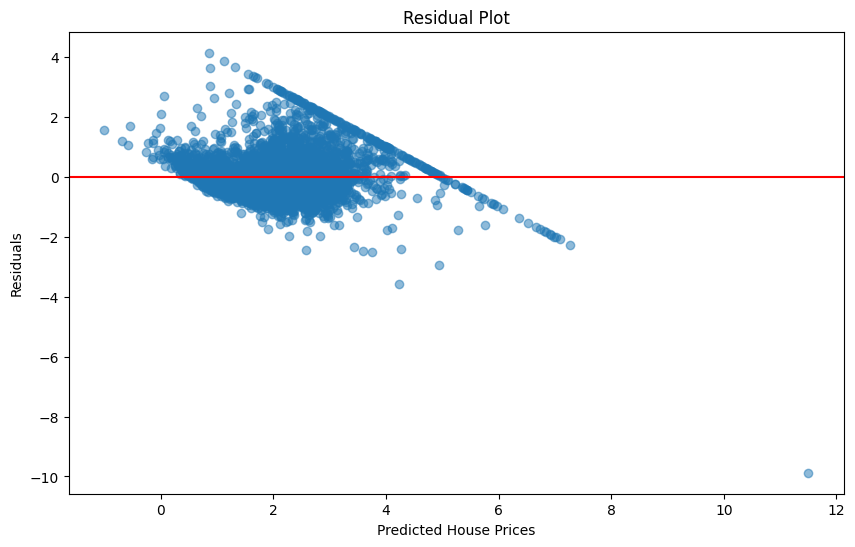

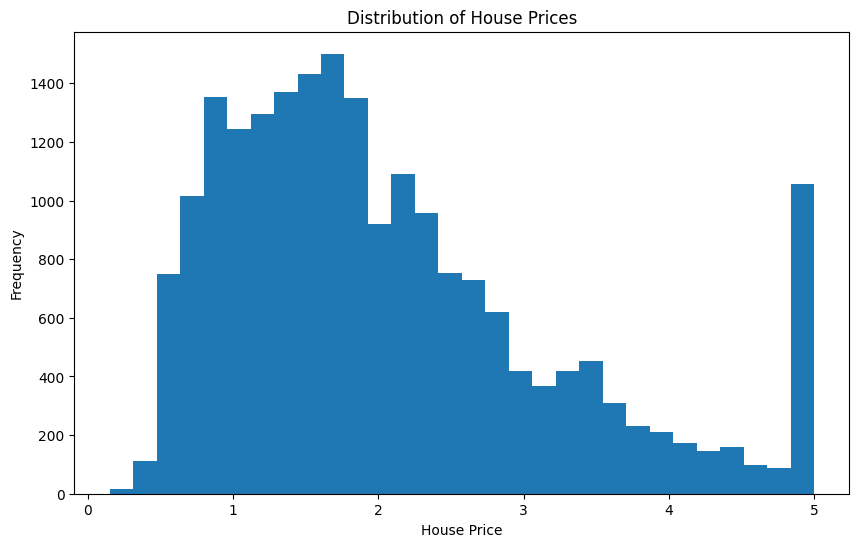

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  19648.000000  19648.000000  19648.000000  19648.000000  19648.000000   
mean       3.676411     28.373066      5.361708      1.096621   1441.368485   
std        1.570602     12.504050      2.293321      0.452136   1144.075196   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.526300     18.000000      4.416667      1.005882    796.000000   
50%        3.449050     28.000000      5.185730      1.048576   1179.000000   
75%        4.582500     37.000000      5.971083      1.099222   1746.250000   
max       15.000100     52.000000    132.533333     34.066667  35682.000000   

           AveOccup      Latitude     Longitude         Price  
count  19648.000000  19648.000000  19648.000000  19648.000000  
mean       3.096560     35.651872   -119.562378      1.920553  
std       10.639195      2.150066      2.005760      0.971109  
min        0.692308     32.54000

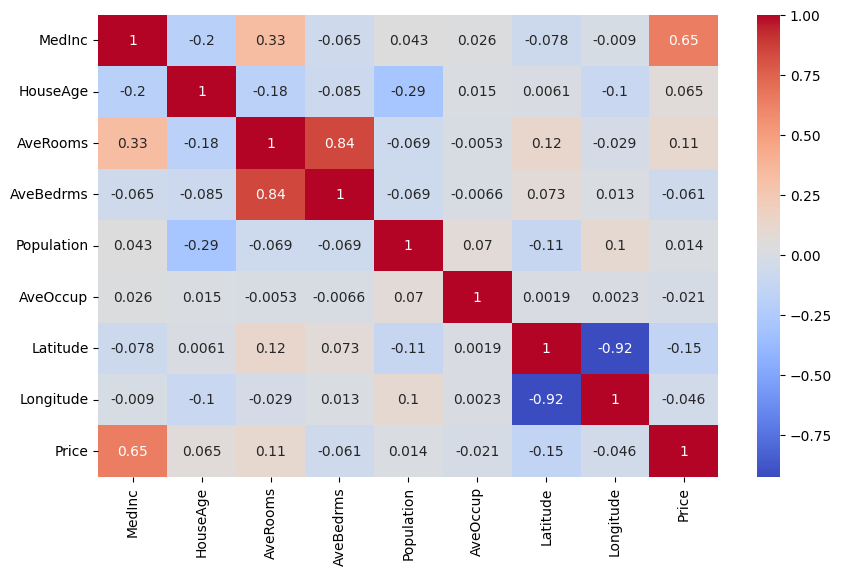

Model RMSE: 0.64286
Filtered Model R^2: 0.56894


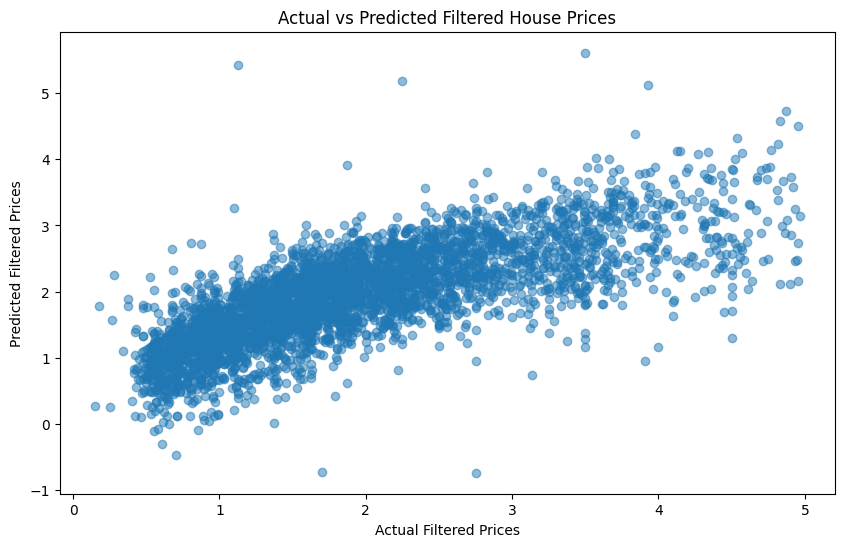

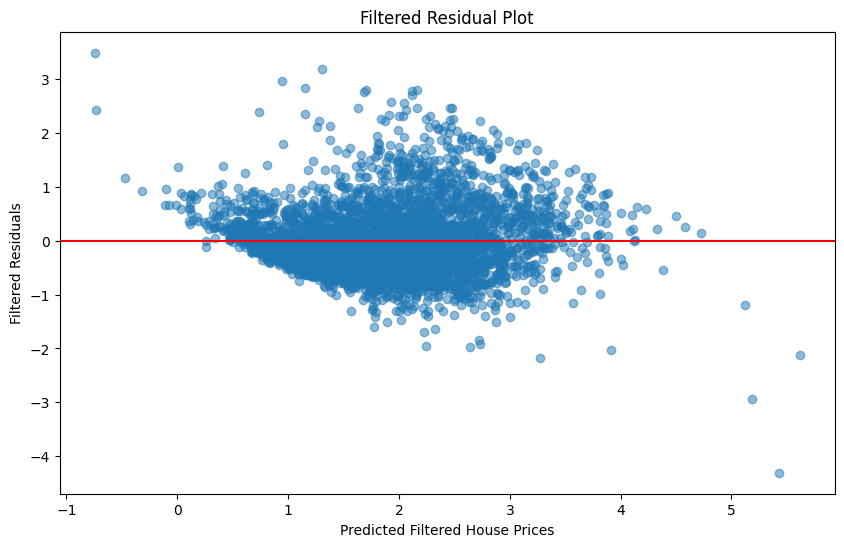

In [1]:
#### Import relevant Python libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.datasets import fetch_california_housing


#### Load California housing dataset and preprocess data

## Fetch California housing data from sklearn

data = fetch_california_housing(download_if_missing=True)

## Convert the numpy array data to a pandas dataframe
df = pd.DataFrame( data.data, columns = data.feature_names ) # data.data gets all of the features in the dataset data
df['Price'] = data.target # adds a new column "Price" to the dataframe which contains the target variable (house prices)

## Check for missing values
print(df.isnull().sum())
print(df.isna().sum())

## Summary stats
print(df.describe())

## Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.show()

#### Train the model and generate predictions

## Define features and target for model
X = df.drop(columns=['Price']) # Features
y = df['Price'] # Target variable

## Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

## Initialize and train the model
model = LinearRegression()
model.fit(X_train,y_train)

## Make predictions
y_pred = model.predict(X_test)

#### Evaluate test performance

## Compute RMSE and R^2
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print(f'Model RMSE: {rmse:.5f}')

r2 = r2_score(y_test, y_pred)
print(f'Model R^2: {r2:.5f}')

## Visualize predicted prices vs actual prices
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()

## Compute and plot residuals

residuals = y_test - y_pred
plt.figure(figsize=(10,6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red')
plt.xlabel('Predicted House Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

#### The model is clearly struggling at the upper end of house prices.
#### Reviewing the data and the scikit-learn documentation of the data, we see that prices are capped at $500k.
#### Look at the following histogram of prices:

## Seems possibly price capped. Let's look at a histogram of house prices
plt.figure(figsize=(10,6))
plt.hist(df['Price'], bins = 30)
plt.xlabel('House Price')
plt.ylabel('Frequency')
plt.title('Distribution of House Prices')
plt.show()

#### Given the cap at $500k, it seems that this dataset is really only appropriate for modeling house prices in the range $0 to $499k$.
#### Let's repeat this process, dropping all houses priced at $500k, and see if the model performs better.

#### Filter out houses priced at $500k
df_filter = df[df['Price'] < 5.0]

## Summary stats
print(df_filter.describe())

## Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df_filter.corr(),annot=True,cmap="coolwarm")
plt.show()

#### Train the model and generate predictions

## Define features and target for model
X_filter = df_filter.drop(columns=['Price']) # Features
y_filter = df_filter['Price'] # Target variable

## Split into training and testing datasets
X_filter_train, X_filter_test, y_filter_train, y_filter_test = train_test_split(X_filter, y_filter, test_size = 0.2, random_state=42)

## Initialize and train the model
model_filter = LinearRegression()
model_filter.fit(X_filter_train,y_filter_train)

## Make predictions
y_filter_pred = model_filter.predict(X_filter_test)

#### Evaluate test performance

## Compute RMSE and R^2
rmse_filter = np.sqrt(mean_squared_error(y_filter_test,y_filter_pred))
print(f'Filtered Model RMSE: {rmse_filter:.5f}')

r2_filter = r2_score(y_filter_test, y_filter_pred)
print(f'Filtered Model R^2: {r2_filter:.5f}')

## Visualize predicted prices vs actual prices
plt.figure(figsize=(10,6))
plt.scatter(y_filter_test,y_filter_pred,alpha=0.5)
plt.xlabel('Actual Filtered Prices')
plt.ylabel('Predicted Filtered Prices')
plt.title('Actual vs Predicted Filtered House Prices')
plt.show()

## Compute and plot residuals

residuals_filter = y_filter_test - y_filter_pred
plt.figure(figsize=(10,6))
plt.scatter(y_filter_pred, residuals_filter, alpha=0.5)
plt.axhline(0, color='red')
plt.xlabel('Predicted Filtered House Prices')
plt.ylabel('Filtered Residuals')
plt.title('Filtered Residual Plot')
plt.show()





